In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from enmspring.graphs_bigtraj import StackMeanModeAgent
from enmspring.kappa_mat import KMat, KappaStrand, Kappa, KappaUpperDown, MeanKappaStrand, MeanKappaStrandHetreo
rootfolder = '/home/ytcdata/bigtraj_fluctmatch/500ns'
rcParams['font.family'] = 'Arial'

### Part 1: Initialize s-agent

In [2]:
host = 'gcgc_21mer'
interval_time = 500
s_agent = StackMeanModeAgent(host, rootfolder, interval_time)

/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/mean_mode_npy exists
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/0_500/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/250_750/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/500_1000/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/750_1250/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/1000_1500/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/1250_1750/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/1500_2000/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/bdna+bdna/1750_2250/pd_dfs exists
Read Dataframe of stacking:

### Part 2: Initialize K-Matrix

In [3]:
kmat_agent = KMat(s_agent)

Load laplacian_mat from /home/ytcdata/bigtraj_fluctmatch/500ns/gcgc_21mer/mean_mode_npy/laplacian.npy
Thare are 399 nodes.
Total number of nodes: 399
There are 201 eigenvectors belonging to STRAND1.
There are 198 eigenvectors belonging to STRAND2.
Sum of two strands: 399


### Part 3: Initialize Strand Plot

In [13]:
# For a_tract_21mer, g_tract_21mer
strand_id = 'STRAND2'
ks_agent = KappaStrand(host, strand_id, s_agent, kmat_agent)
m_agent = MeanKappaStrand(host, strand_id, s_agent, kmat_agent)

In [4]:
# For atat_21mer, gcgc_21mer
basetype_i = 'G' # 'A', 'T', 'G', 'C'
m_agent = MeanKappaStrandHetreo(host, basetype_i, s_agent, kmat_agent)

### Part 4: Set $m$ and $n$

In [5]:
m = 1
n = s_agent.n_node # s_agent.n_node

### Part 5: Observe Min and Max

In [ ]:
minimum, maximum = ks_agent.get_kmin_kmax(m, n)
minimum = 0

Min: -0.283  Max: 5.001

In [7]:
minimum = 1.0 # 1.0 or 1.5
maximum = 3.246

### Part 6-1: Plot

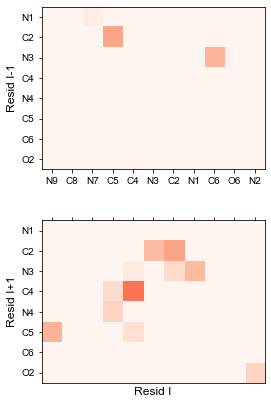

In [7]:
figsize = (4, 7.5)
fig, im_k, im_j, axes = m_agent.plot_mean_heatmap(figsize, m, n, minimum, maximum)
#plt.tight_layout()
if host in ['a_tract_21mer', 'g_tract_21mer']:
    plt.savefig(f'/home/yizaochen/Desktop/drawzone_temp/{host}_{strand_id}_{m}_{n}.png', dpi=200, transparent=False)
elif host in ['atat_21mer', 'gcgc_21mer']:
    plt.savefig(f'/home/yizaochen/Desktop/drawzone_temp/{host}_{basetype_i}_{m}_{n}.png', dpi=200, transparent=False)
plt.show()

### Part 6-2: Plot(Reverse)

In [ ]:
figsize = (4, 7.5)
fig, im_k, im_j, axes = m_agent.plot_mean_heatmap_reverse(figsize, m, n, minimum, maximum)
#plt.tight_layout()
if host in ['a_tract_21mer', 'g_tract_21mer']:
    plt.savefig(f'/home/yizaochen/Desktop/drawzone_temp/{host}_{strand_id}_{m}_{n}.png', dpi=200, transparent=False)
elif host in ['atat_21mer', 'gcgc_21mer']:
    plt.savefig(f'/home/yizaochen/Desktop/drawzone_temp/{host}_{basetype_i}_{m}_{n}.png', dpi=200, transparent=False)
plt.show()

### Part 6-3: Single Plot

In [8]:
d_dot_criteria = {'a_tract_21mer': {'STRAND1': 2.0, 'STRAND2': 2.0}, 
                  'g_tract_21mer': {'STRAND1': 1.5, 'STRAND2': 1.5},
                  'atat_21mer': 2.2, 'gcgc_21mer': 1.5}

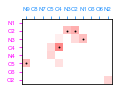

In [9]:
figsize = (1.75, 1.75)
if host in ['a_tract_21mer', 'g_tract_21mer']:
    dot_criteria = d_dot_criteria[host][strand_id]
elif host in ['atat_21mer', 'gcgc_21mer']:
    dot_criteria = d_dot_criteria[host]

fig, im_j, axes = m_agent.plot_mean_heatmap_single(figsize, m, n, minimum, maximum, dot_criteria)
plt.tight_layout()

if host in ['a_tract_21mer', 'g_tract_21mer']:
    plt.savefig(f'/home/yizaochen/Desktop/drawzone_temp/{host}_{strand_id}_{m}_{n}.svg', dpi=300, transparent=False)
elif host in ['atat_21mer', 'gcgc_21mer']:
    plt.savefig(f'/home/yizaochen/Desktop/drawzone_temp/{host}_{basetype_i}_{m}_{n}.svg', dpi=300, transparent=False)
plt.show()

### Part 7: Color Bar

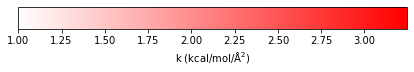

In [15]:
figsize = (6, 2)
cb1 = ks_agent.plot_colorbar(figsize, minimum, maximum)
plt.savefig('/home/yizaochen/Desktop/drawzone_temp/colorbar.svg', dpi=300, transparent=False)
plt.show()

In [12]:
CMAP = LinearSegmentedColormap.from_list('mycmap', ['white','red'])

In [40]:
figsize = (0.8, 0.258)
fig = plt.figure(figsize=figsize)
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
norm = Normalize(vmin=minimum, vmax=maximum)
cmap = cm.get_cmap(CMAP)
cb1 = ColorbarBase(ax1, cmap=cmap, norm=norm, orientation='horizontal')
cb1.ax.tick_params(labelsize=4, length=1, pad=1.0, width=0.4)
cb1.set_ticks([1, 1.5, 2.0, 2.5, 3.0])
cb1.outline.set_linewidth(0.4)
plt.savefig('/home/yizaochen/Desktop/drawzone_temp/colorbar.svg', dpi=300, transparent=True)
plt.show()